In [14]:
from data.dataset import Dataset
import warnings
warnings.filterwarnings("ignore")
#import matplotlib.pyplot as plt #visualization%import seaborn as sns #visualization
%matplotlib inline
import seaborn as sns
import itertools
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

In [2]:
data_dir = ''
data_ = Dataset()
dataset = data_.prepare()

READING DATASET
PREPARING DATASET
	 cleaned null values...
	 extracted datetime variables...
	 cleaned outliers...
	 generated features...
Dataset size: (4860958, 18)
Elapsed time: 64.53929281234741


In [3]:
dataset.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,month_name,month_year,week_day,day,hour,log_fare_amount,trip_distance_km,log_trip_distance
0,2015-06-30 23:59:03.0000004,11.0,2015-06-30 23:59:03,-73.969475,40.750282,-73.993965,40.751568,1,2015,6,Jun,2015 - Jun,Tuesday,30,23,2.397895,2.068571,0.726858
1,2015-06-30 23:56:50.0000001,14.5,2015-06-30 23:56:50,-73.992104,40.734531,-73.960335,40.775703,1,2015,6,Jun,2015 - Jun,Tuesday,30,23,2.674149,5.304466,1.668549
2,2015-06-30 23:56:00.0000001,20.0,2015-06-30 23:56:00,-73.970154,40.757011,-73.962608,40.708641,1,2015,6,Jun,2015 - Jun,Tuesday,30,23,2.995732,5.417685,1.689669
3,2015-06-30 23:55:51.0000007,6.5,2015-06-30 23:55:51,-74.010147,40.720520,-74.000557,40.727139,1,2015,6,Jun,2015 - Jun,Tuesday,30,23,1.871802,1.093388,0.089281
4,2015-06-30 23:53:49.0000003,7.5,2015-06-30 23:53:49,-73.959969,40.762405,-73.953064,40.782688,1,2015,6,Jun,2015 - Jun,Tuesday,30,23,2.014903,2.329810,0.845787


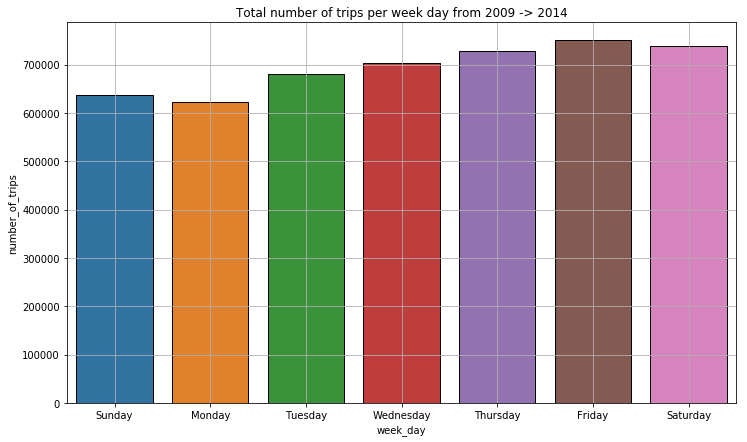

In [41]:
day_count = dataset["week_day"].value_counts().reset_index()
day_count.columns = ["week_day","number_of_trips"]
day_count["order"]  = day_count["week_day"].replace({"Sunday" :1,'Monday' : 2, 'Tuesday': 3,
                                                    'Wednesday':4,'Thursday' :5, 'Friday':6,
                                                    'Saturday':7})
day_count = day_count.sort_values(by = "order",ascending  = True)

plt.figure(figsize = (12,7))
sns.barplot("week_day","number_of_trips",
             data = day_count,order = day_count['week_day'],
             linewidth =1,edgecolor = "k"*len(day_count['order'])
            )
plt.grid(True)
plt.title("Total number of trips per week day from 2009 -> 2014")
plt.show()


#Comment people tend to go out and use taxi more on toward the weekend


In [42]:
avg_fare_hr = dataset.groupby("hour")["fare_amount"].mean().reset_index()
avg_fare_hr
trace = go.Scatter(x = avg_fare_hr["hour"],y = avg_fare_hr["fare_amount"],
                   mode = "markers+lines",
                  marker = dict(color = "blue",size = 9,
                                line = dict(color = "black",width =2)))

#layout
layout = go.Layout(dict(title = "Average fare by hour",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = "hour",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = "average_fare",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                       )
                  )

fig = go.Figure(data = [trace],layout = layout)
py.iplot(fig)


In [26]:
day_count['count']

5    637109
6    623511
4    681286
3    703601
2    727948
0    749731
1    737772
Name: count, dtype: int64

In [30]:
fare_wk = dataset.groupby("week_day")["fare_amount"].mean().reset_index()

In [31]:
fare_wk


,week_day,fare_amount
0,Friday,11.210579
1,Monday,11.167380
2,Saturday,10.822599
3,Sunday,11.412175
4,Thursday,11.293469
5,Tuesday,11.003409
6,Wednesday,11.121971
